### IMPORTING DATA

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Upi_transaction_master.csv')
df.head(5)

,Transaction_ID,User_ID,Merchant_ID,User_name,Gender,Age,User_City,User_State,Merchant_Name,Merchant_State,...,Transaction_Type,Upi_App,Device_Type,Amount,Transaction_Date,Txn_Hour,Txn_Day,Txn_Weekday,Txn_Month,Transaction_Status
0,T300001,U100178,M200435,Dishani Dubey,Female,32,Karimnagar,Telangana,Cherian and Sons,Bihar,...,P2M,Google Pay,iOS,1170.09,2024-07-30 13:42:29,13,1,Tuesday,7,Success
1,T300002,U100896,M201473,Rati Balay,Female,36,Pune,Maharashtra,"Kibe, Bora and Halder",Punjab,...,P2P,PhonePe,KaiOS,365.61,2024-11-25 00:45:07,0,0,Monday,11,Success
2,T300006,U101551,M200480,Manish,Male,32,Rohtak,Haryana,Batta-Srinivas,Telangana,...,P2P,PhonePe,Windows,8.59,2024-09-22 08:12:07,8,6,Sunday,9,Success
3,T300007,U100491,M200820,Rahul,Male,33,Patna,Bihar,"Sodhi, Chacko and Shan",Uttarakhand,...,P2M,PhonePe,Android,68.70,2024-12-22 05:45:02,5,6,Sunday,12,Success
4,T300008,U100060,M200113,Hrishita Sood,Female,24,Madurai,Tamil Nadu,Sampath PLC,Goa,...,P2P,Navi,Windows,487.30,2024-01-29 01:55:44,1,0,Monday,1,Success


### DATA CLEANING AND PROCESSING

In [17]:
df.isnull().sum()

Transaction_ID          0
User_ID                 0
Merchant_ID             0
User_name               0
Gender                  0
Age                     0
User_City               0
User_State              0
Merchant_Name           0
Merchant_State          0
Category              764
Payment_Mode            0
Transaction_Type        0
Upi_App                 0
Device_Type           232
Amount                  0
Transaction_Date        0
Txn_Hour                0
Txn_Day                 0
Txn_Weekday             0
Txn_Month               0
Transaction_Status      0
dtype: int64

In [18]:
print(df.isnull().values.any())

True


In [19]:
print(df['Category'].isnull().sum())

764


In [20]:
print(df['Device_Type'].isnull().sum())

232


In [21]:
print(df['Transaction_ID'].duplicated().sum())

0


In [22]:
df.describe()

,Age,Amount,Txn_Hour,Txn_Day,Txn_Month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,31.817033,505.419028,11.517533,2.979200,6.549800
std,11.085061,499.326955,6.923378,2.001741,3.458013
min,18.000000,0.020000,0.000000,0.000000,1.000000
25%,24.000000,147.302500,6.000000,1.000000,4.000000
50%,30.000000,348.605000,12.000000,3.000000,7.000000
75%,37.000000,707.210000,18.000000,5.000000,10.000000
max,69.000000,4580.970000,23.000000,6.000000,12.000000


In [23]:
df['Category'].unique()

array(['Clothing', 'Food Delivery', 'Education', 'Electronics', 'Grocery',
       'Recharge', 'Travel', nan], dtype=object)

In [24]:
df['Device_Type'].unique()

array(['iOS', 'KaiOS', 'Windows', 'Android', nan], dtype=object)

In [29]:
df['Category'].fillna('Unknown', inplace=True)

In [26]:
df['Category'].value_counts()

Category
Recharge         4462
Electronics      4285
Food Delivery    4280
Grocery          4247
Clothing         4028
Education        4018
Travel           3916
Unknown           764
Name: count, dtype: int64

In [28]:
df['Device_Type'].fillna('Unknown', inplace=True)
df['Device_Type'].value_counts()

Device_Type
Windows    7719
Android    7457
KaiOS      7323
iOS        7269
Unknown     232
Name: count, dtype: int64

### Make a column by Categories the the amount on the bases of amount

In [30]:
def categorize_amount(amount):
    if amount < 400:
        return 'Low'
    elif amount < 1000:
        return 'Medium'
    else:
        return 'High'

# Apply the function to the column
df['Amount_Category'] = df['Amount'].apply(categorize_amount)


#### Make a column by group by age column

In [31]:
def age_group(age):
    if age < 18:
        return 'Underage'
    elif 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 35:
        return '25-35'
    elif 36 <= age <= 45:
        return '36-45'
    elif 45 <= age <= 60:
        return '45-60'    
    else:
        return '60+'

# Apply to the Age column
df['Age_Group'] = df['Age'].apply(age_group)


In [32]:
df.head()

,Transaction_ID,User_ID,Merchant_ID,User_name,Gender,Age,User_City,User_State,Merchant_Name,Merchant_State,...,Device_Type,Amount,Transaction_Date,Txn_Hour,Txn_Day,Txn_Weekday,Txn_Month,Transaction_Status,Amount_Category,Age_Group
0,T300001,U100178,M200435,Dishani Dubey,Female,32,Karimnagar,Telangana,Cherian and Sons,Bihar,...,iOS,1170.09,2024-07-30 13:42:29,13,1,Tuesday,7,Success,High,25-35
1,T300002,U100896,M201473,Rati Balay,Female,36,Pune,Maharashtra,"Kibe, Bora and Halder",Punjab,...,KaiOS,365.61,2024-11-25 00:45:07,0,0,Monday,11,Success,Low,36-45
2,T300006,U101551,M200480,Manish,Male,32,Rohtak,Haryana,Batta-Srinivas,Telangana,...,Windows,8.59,2024-09-22 08:12:07,8,6,Sunday,9,Success,Low,25-35
3,T300007,U100491,M200820,Rahul,Male,33,Patna,Bihar,"Sodhi, Chacko and Shan",Uttarakhand,...,Android,68.70,2024-12-22 05:45:02,5,6,Sunday,12,Success,Low,25-35
4,T300008,U100060,M200113,Hrishita Sood,Female,24,Madurai,Tamil Nadu,Sampath PLC,Goa,...,Windows,487.30,2024-01-29 01:55:44,1,0,Monday,1,Success,Medium,18-24


 ### Total No of Unique user

In [33]:

total_registered_users = df['User_ID'].nunique()                  # Calculate total registered users (unique User_IDs)

print("Total Registered Users:", total_registered_users)          # Print the result

Total Registered Users: 6916


### Total NO of transaction 

In [34]:
Total_no_of_txn=df['Transaction_ID'].count()
print("Total No Of Transaction :",Total_no_of_txn)

Total No Of Transaction : 30000


### Total Transaction Value

In [35]:
Total_Amount = df['Amount'].sum()
print("Total Transaction Value :",round(Total_Amount,2))

Total Transaction Value : 15162570.85


### State Wise (No Of Transaction) 

User_State
Maharashtra      4758
Karnataka        3014
Uttar Pradesh    2853
Tamil Nadu       2437
Telangana        2303
Name: Transaction_ID, dtype: int64


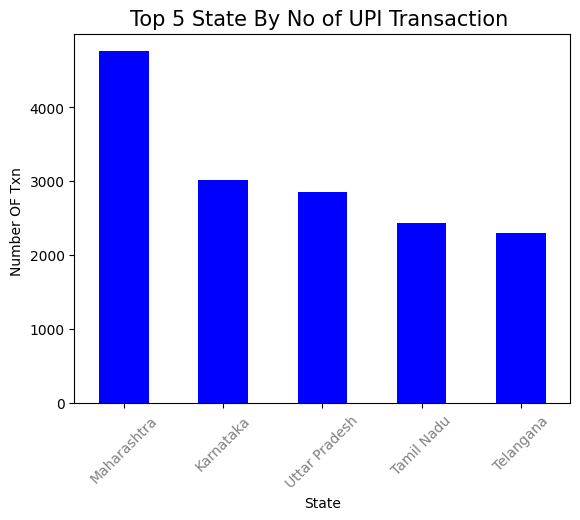

In [36]:
# Group by state and count transactions

gb = df.groupby('User_State')['Transaction_ID'].count().sort_values(ascending=False).head(5)
print(gb)

#plotting
gb.plot(kind='bar', color='Blue')
plt.title("Top 5 State By No of UPI Transaction ",fontsize=15)
plt.xlabel("State")
plt.ylabel("Number OF Txn ")
plt.xticks(rotation=45,color='gray')
plt.show()

### State Wise Transaction Volume

User_State
Maharashtra      2453348.82
Karnataka        1516940.96
Uttar Pradesh    1471860.22
Tamil Nadu       1194565.02
Telangana        1171046.92
Name: Amount, dtype: float64


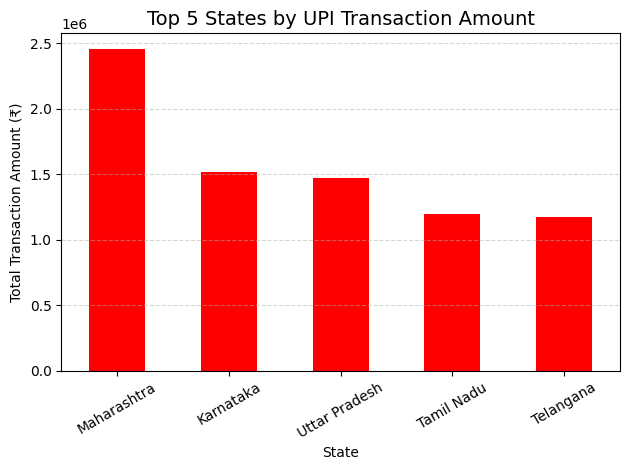

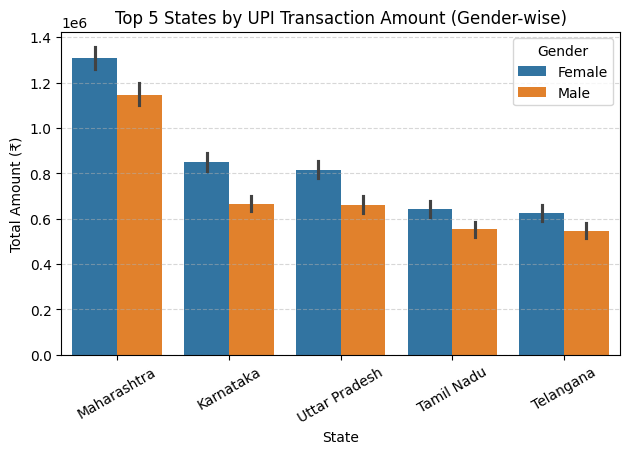

In [37]:
# Group and get top 5 states
gb =df.groupby('User_State')['Amount'].sum().sort_values(ascending=False).head(5)
print(gb)
# Plotting 
gb.plot(kind='bar', color='red')
plt.title('Top 5 States by UPI Transaction Amount', fontsize=14)
plt.xlabel('State')
plt.ylabel('Total Transaction Amount (₹)')
plt.xticks(rotation=30)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.show()


# Plot with hue (requires unaggregated data)
sns.barplot(data=df, x="User_State", y="Amount", hue="Gender", 
            estimator="sum", order=df.groupby('User_State')['Amount'].sum().sort_values(ascending=False).head(5).index)

plt.title("Top 5 States by UPI Transaction Amount (Gender-wise)")
plt.xlabel("State")
plt.ylabel("Total Amount (₹)")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=.5)
plt.tight_layout()
plt.show()


### UPI Transaction Status Distribution by Count and  Amount

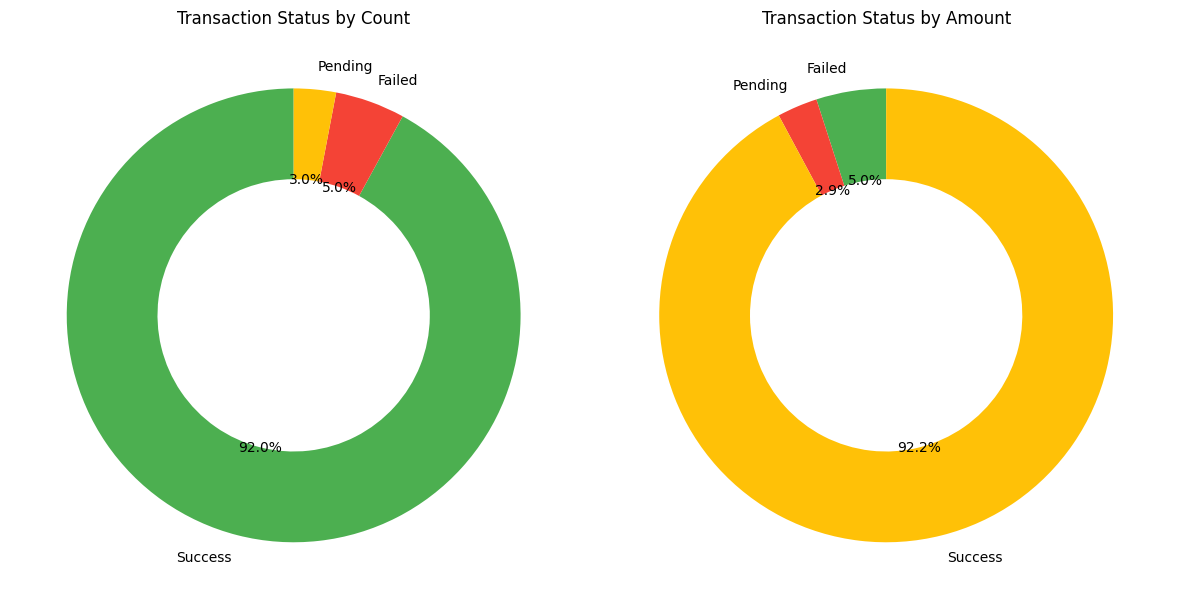

In [49]:
# Grouping by Transaction Status

# Plotting both donut charts side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

colors = ['#4CAF50', '#F44336', '#FFC107']  # Success, Failure, Pending

# Donut chart by Count
axs[0].pie(
    status_count,
    labels=status_count.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)
axs[0].set_title("Transaction Status by Count")

# Donut chart by Amount
axs[1].pie(
    status_amount,
    labels=status_amount.index,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)
axs[1].set_title("Transaction Status by Amount")
plt.tight_layout()
plt.show()

### Count of transactions by Gender

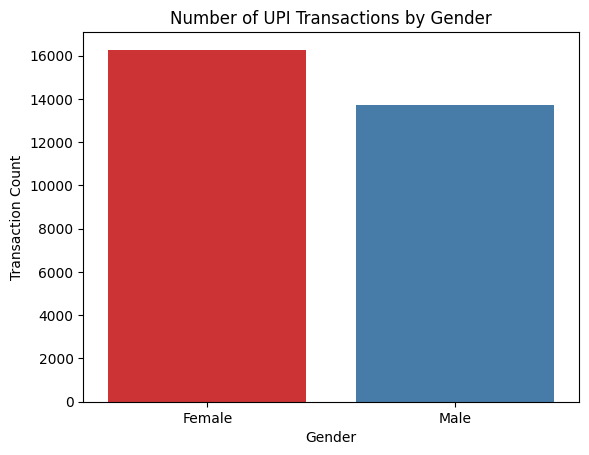

In [39]:
# Count of transactions by Gender
sns.countplot(data=df, x="Gender", palette="Set1", hue ='Gender')

# Add labels and title
plt.title("Number of UPI Transactions by Gender")
plt.xlabel("Gender")
plt.ylabel("Transaction Count")
plt.show()


### Transaction Status Distribution

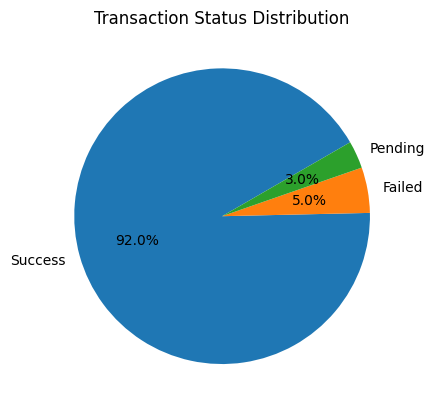

In [40]:
tx= df['Transaction_Status'].value_counts()
plt.pie(tx,labels=tx.index,startangle=30,autopct="%1.1f%%")
plt.title("Transaction Status Distribution")
plt.show()


### Weekday wise Trend Analysis

Txn_Weekday
Tuesday      2238892.55
Monday       2192910.61
Friday       2186769.93
Sunday       2177964.58
Thursday     2138440.03
Saturday     2129697.08
Wednesday    2097896.07
Name: Amount, dtype: float64


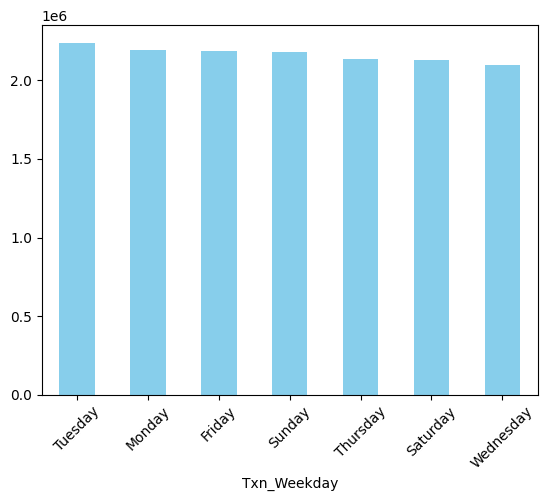

In [41]:
gb =df.groupby('Txn_Weekday')['Amount'].sum().sort_values(ascending=False)
print(gb)
gb.plot(kind="bar",color="Skyblue")
plt.xticks(rotation=45)
plt.show()

### Month wise Trend Analysis

Txn_Month
1     1282110.10
2     1150035.95
3     1269428.53
4     1213888.05
5     1274257.22
6     1227747.18
7     1265142.17
8     1319710.97
9     1267178.73
10    1274992.99
11    1317210.35
12    1300868.61
Name: Amount, dtype: float64


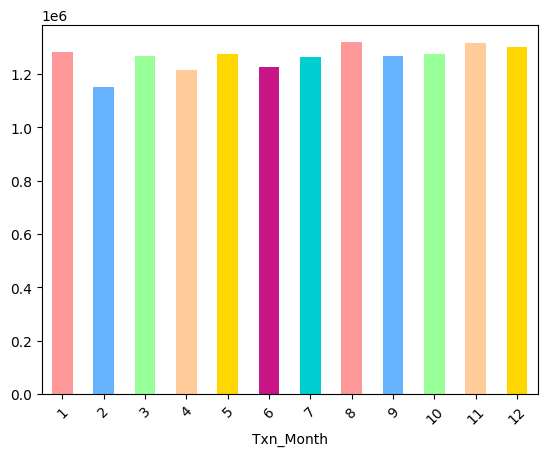

In [42]:
gb =df.groupby('Txn_Month')['Amount'].sum()
print(gb)
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700', '#C71585', '#00CED1']

gb.plot(kind="bar",color=colors)
plt.xticks(rotation=45)
plt.show()

### Group wise distribution of Transaction Amount

Age_Group
25-35    12847
18-24     8698
36-45     5502
45-60     1857
60+       1096
Name: count, dtype: int64


Text(0.5, 1.0, 'Transaction Amount Distribution by Age Group')

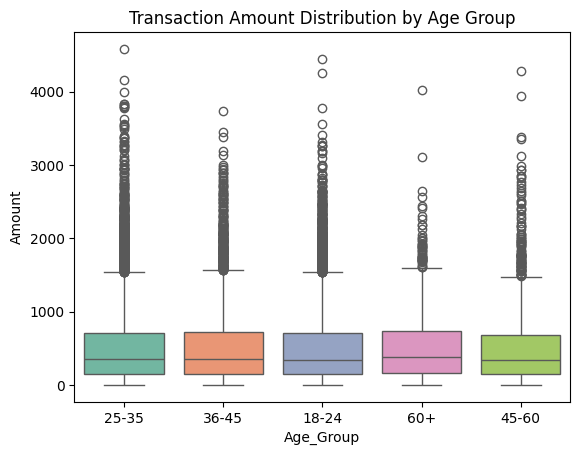

In [43]:
gb =df['Age_Group'].value_counts()
print(gb)
sns.boxplot(x='Age_Group', y='Amount', data=df, palette='Set2',hue = "Age_Group")

plt.title("Transaction Amount Distribution by Age Group")


In [ ]:
Transaction Count and Transactin Amount distribution based on Amount Category

Amount_Category
Low       16428
Medium     9419
High       4153
Name: count, dtype: int64


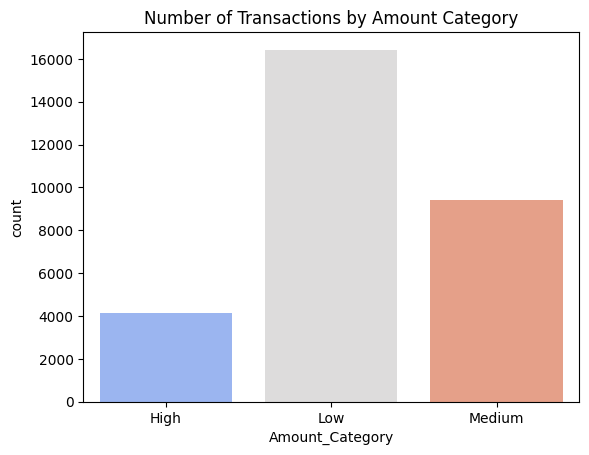

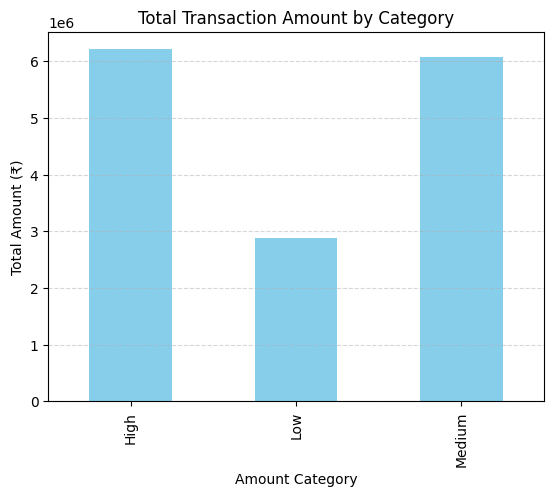

In [48]:
Amount_Category_count=df['Amount_Category'].value_counts()
print(Amount_Category_count)

#Count of Transactions per Amount Category
sns.countplot(x='Amount_Category', data=df, palette='coolwarm',hue="Amount_Category")
plt.title("Number of Transactions by Amount Category")
plt.show()

# Total Amount per Category 
ax =df.groupby('Amount_Category')['Amount'].sum()
ax.plot(kind='bar', color='skyblue')
plt.title("Total Transaction Amount by Category")
plt.xlabel("Amount Category")
plt.ylabel("Total Amount (₹)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


### Peak Transaction Hours

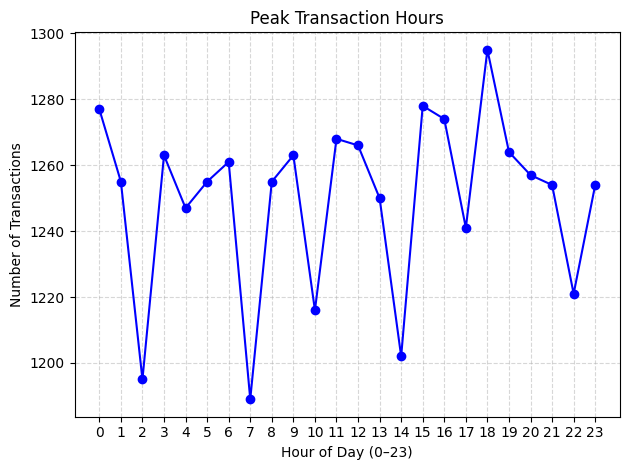

In [50]:
# Count of transactions per hour
hourly_txn = df.groupby('Txn_Hour')['Transaction_ID'].count()
plt.plot(hourly_txn.index, hourly_txn.values, marker='o', color='blue')
plt.title("Peak Transaction Hours")
plt.xlabel("Hour of Day (0–23)")
plt.ylabel("Number of Transactions")
plt.grid(True, linestyle='--', alpha=0.5)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


### Top 10 Merchants by Transaction Amount

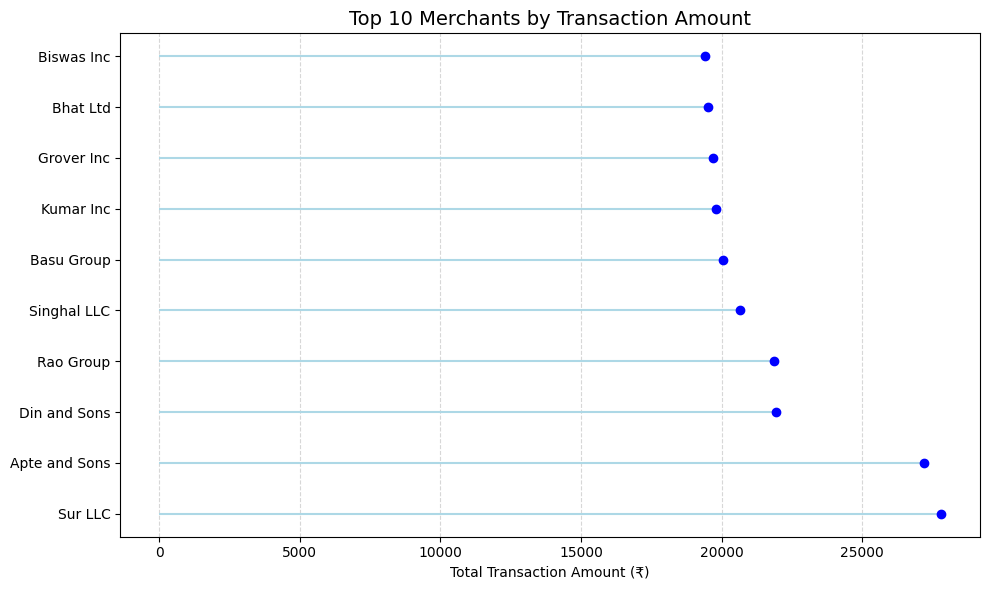

In [51]:
top_merchants_amt = df.groupby('Merchant_Name')['Amount'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
plt.hlines(y=top_merchants_amt.index, xmin=0, xmax=top_merchants_amt.values, color='lightblue')
plt.plot(top_merchants_amt.values, top_merchants_amt.index, 'o', color='blue')
plt.title("Top 10 Merchants by Transaction Amount", fontsize=14)
plt.xlabel("Total Transaction Amount (₹)")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### Category Wise Upi Spend

C:\Users\sohai\AppData\Local\Temp\ipykernel_3168\3807818346.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_r')


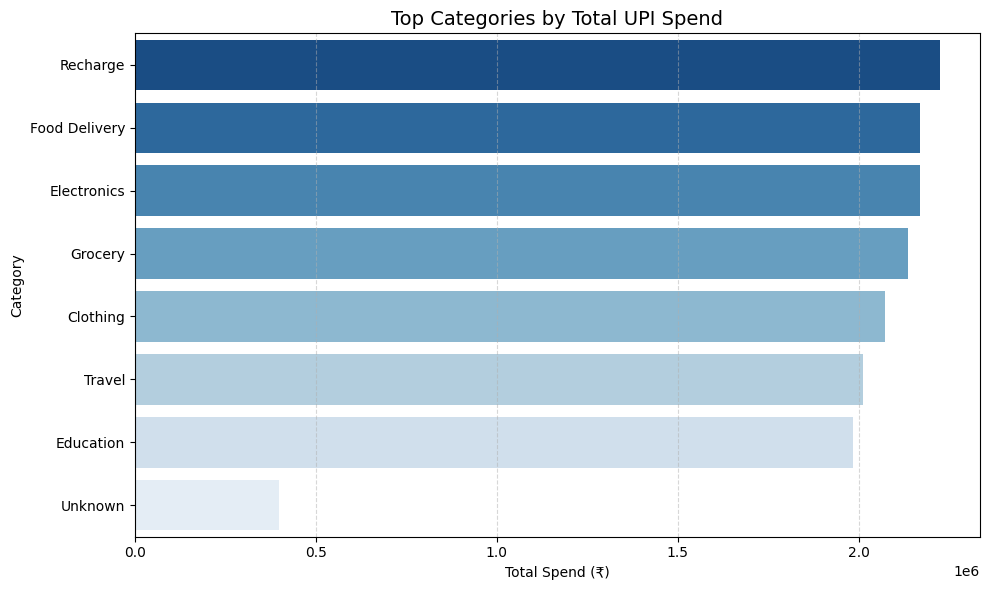

In [61]:
top_categories = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=top_categories.values, y=top_categories.index, palette='Blues_r')
plt.title("Top Categories by Total UPI Spend", fontsize=14)
plt.xlabel("Total Spend (₹)")
plt.ylabel("Category")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Which Payment Mode is Used Most

C:\Users\sohai\AppData\Local\Temp\ipykernel_3168\3026884072.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_mode_counts.index, y=payment_mode_counts.values, palette='Set2')


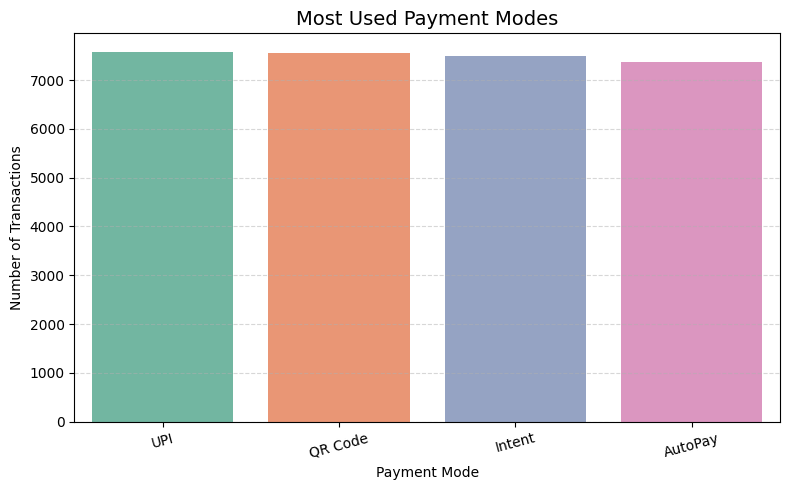

In [64]:
payment_mode_counts = df['Payment_Mode'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=payment_mode_counts.index, y=payment_mode_counts.values, palette='Set2')
plt.title('Most Used Payment Modes', fontsize=14)
plt.xlabel('Payment Mode')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


### APP USED FOR UPI TRANSACTION

Upi_App
PhonePe        13752
Google Pay     10662
Paytm           1989
super.money     1589
Navi            1574
CRED             265
BHIM             169
Name: count, dtype: int64


C:\Users\sohai\AppData\Local\Temp\ipykernel_3168\241919508.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=upi_app_pct.index, y=upi_app_pct.values, palette='viridis')


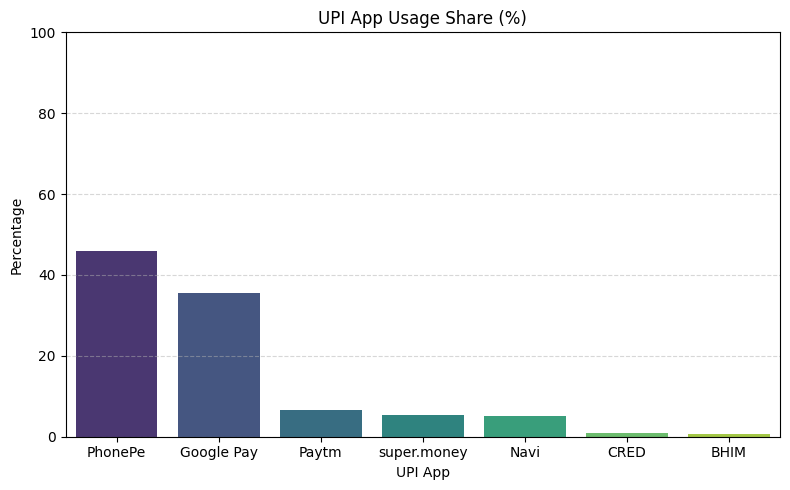

In [71]:
ux=df['Upi_App'].value_counts()
print(ux)

upi_app_pct = df['Upi_App'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
sns.barplot(x=upi_app_pct.index, y=upi_app_pct.values, palette='viridis')
plt.title("UPI App Usage Share (%)")
plt.ylabel("Percentage")
plt.xlabel("UPI App")
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()